In [288]:
import numpy as np
import matplotlib.pyplot as plt

In [289]:
plt.style.use("ggplot")

In [290]:
T = 10
harmonics = 10
STEP = 0.1

def ex_func(x):
    p = T/2
    lbLeft = -p
    lbRight = 0
    ubLeft = 0
    ubRight = p
    
    g, ng = 1, -1
    
    while True:
        if x >= lbLeft and x <= lbRight:
            return ng
        if x >= ubLeft and x <= ubRight:
            return g
        lbLeft -= p
        lbRight -= p
        ubLeft += p
        ubRight += p
        
        if g == 1:
            g = -1
            ng = 1
        else:
            g = 1
            ng = -1

In [328]:
def bn(f, n, T):
    res = 0.0
    for i in np.arange(0.001, T, STEP):
        res += f(i) * np.sin(wn(n, T) * i) * STEP
    return 2.0 / T * res

def an(f, n, T):
    res = 0.0
    for i in np.arange(0.001, T, STEP):
        res += f(i) * np.cos(wn(n, T) * i) * STEP
    return 2.0 / T * res

def wn(n, T):
    return (2.0 * np.pi * n) / T

def a0(f, T):
    res = 0.0
    for i in np.arange(0.001, T, STEP):
        res += f(i) * STEP
    return 2.0 / T * res

def fourierSeries(N_MAX, f, x, T):
    s = a0(f, T)
    
    for n in range(N_MAX):
        s += an(f, n, T) * np.cos(wn(n, T) * x) + bn(f, n, T) * np.sin(wn(n, T) * x)
    return s

In [329]:
x_ = np.linspace(-20,20,100)
y = []
f = []
for i in x_:
    y.append(ex_func(i))
    f.append(fourierSeries(harmonics, func, i, T))
    
def viz(x, y, f, harmonics=harmonics):
    plt.plot(x, y, color="blue", label="Signal")
    plt.plot(x, f, color="red", label="Fourier series approximation")
    plt.title("Fourier Series approximation number of harmonics: " + str(harmonics))
    plt.legend()
    plt.show()

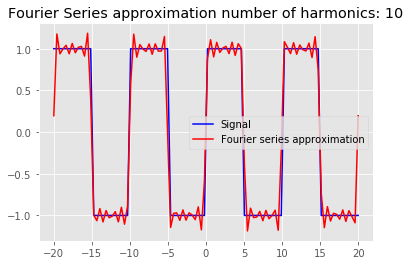

In [330]:
viz(x_, y, f)

In [331]:
def run(X, func, T=T, harmonics=harmonics):
    y = []
    f = []
    
    for x in X:
        y.append(func(x))
        f.append(fourierSeries(harmonics, func, x, T))
        
    viz(X, y, f)

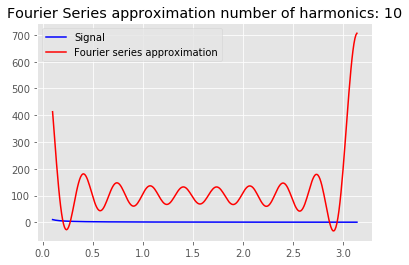

In [332]:
def f1(x):
    return 1.0 / x

X = np.arange(0.1, np.pi, 0.01)
run(X, f1, np.pi, 10)

6.63734885431


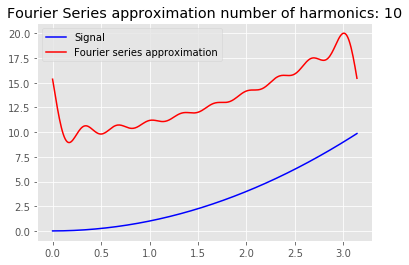

In [335]:
def f2(x):
    return x**2

X = np.arange(0.0, np.pi, 0.01)
print(a0(f2, np.pi))
run(X, f2, np.pi, 10)

In [263]:
# x**3 | -5..5
(125 + 125) / 10.0/ 3

8.333333333333334

In [403]:
def DFT(fnList, NN):
    N = len(fnList)
    FmList = []
    for m in range(NN):
        Fm = 0.0
        for n in range(N):
            Fm += fnList[n] * cmath.exp(- 1j * pi2 * m * n / N)
        FmList.append(Fm / N)
    return FmList

In [404]:
def InverseDFT(FmList, NN):
    N = len(FmList)
    fnList = []
    for n in range(NN):
        fn = 0.0
        for m in range(N):
            fn += FmList[m] * cmath.exp(1j * pi2 * m * n / N)
        fnList.append(fn)
    return fnList

In [367]:
# TEST
print "Input Sine Wave Signal:"
N = 360 # degrees (Number of samples)
a = float(random.randint(1, 100))
f = float(random.randint(1, 100))
p = float(random.randint(0, 360))
print "frequency = " + str(f)
print "amplitude = " + str(a)
print "phase ang = " + str(p)
print
fnList = []
for n in range(N):
    t = float(n) / N * pi2
    fn = a * math.sin(f * t + p / 360 * pi2)
    fnList.append(fn)

print "DFT Calculation Results:"
FmList = DFT(fnList)
threshold = 0.001
for (i, Fm) in enumerate(FmList):
    if abs(Fm) > threshold:
        print "frequency = " + str(i)
        print "amplitude = " + str(abs(Fm) * 2.0)
        p = int(((cmath.phase(Fm) + pi2 + pi2 / 4.0) % pi2) / pi2 * 360 + 0.5)
        print "phase ang = " + str(p)
        print

Input Sine Wave Signal:
frequency = 97.0
amplitude = 73.0
phase ang = 267.0

DFT Calculation Results:
frequency = 97
amplitude = 73.0
phase ang = 267

frequency = 263
amplitude = 73.0
phase ang = 273



In [366]:
viz(x, fnList, fnList2)

ValueError: x and y must have same first dimension, but have shapes (10,) and (360,)

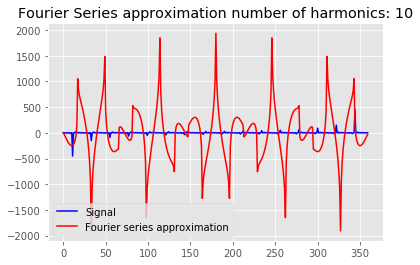

In [348]:
def get_f():
    x = []
    y = []
    R = 2.0
    
    for idx, fi in enumerate(range(360)):
        x.append(idx)
        y.append(R * np.tan(fi))
    return x, y

x, y = get_f()
f = InverseDFT(y)
viz(x, y, f)

In [374]:
def viz_polar(x, y, color='green'):
#     r = np.arange(0, 2, 0.01)
#     theta = 2 * np.pi * r

    ax = plt.subplot(111, projection='polar')
    ax.plot(x, y, color=color)
    ax.set_rmax(2)
    ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
    ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
    ax.grid(True)

    ax.set_title("A line plot on a polar axis", va='bottom')
    plt.show()

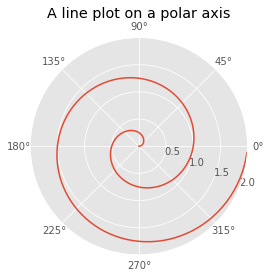

In [358]:
viz_polar(2 * np.pi * np.arange(0, 2, 0.01), np.arange(0, 2, 0.01))

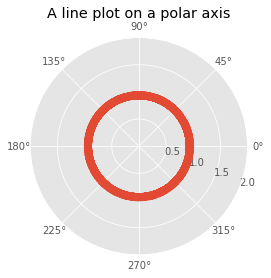

In [359]:
r = [1] * N
theta = np.linspace(0, 360, N)
viz_polar(theta, r)

In [368]:
x = np.ones(N)
y = np.linspace(0, 360, N)
f = InverseDFT(DFT(y))

viz_polar(y, x)
viz_polar(f, x)

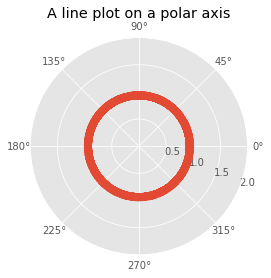

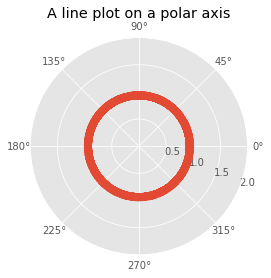

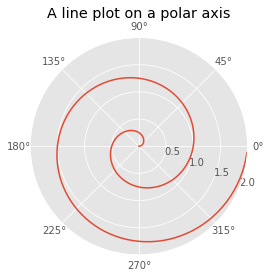

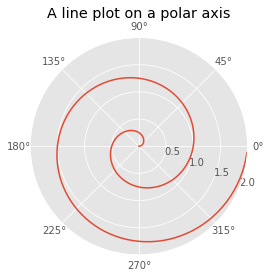

In [371]:
x = 2 * np.pi * np.arange(0, 2, 0.01)
y = np.arange(0, 2, 0.01)
f = InverseDFT(DFT(y))
viz_polar(x, y)
viz_polar(x, f)

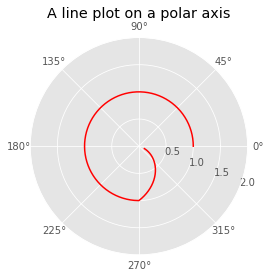

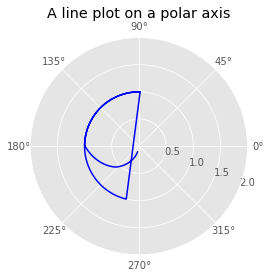

In [409]:
N = 360
x = np.ones(3 * N / 4)
y = np.linspace(0, 1.5 * np.pi, 3 * N / 4)

g = 1.0
th = 0.0
for i in range(N / 4):
    x = np.append(x, g)
    g -= 0.01
    y = np.append(y, np.pi * 1.5 + th)
    th += 0.013

# f = np.fft.fft(y)
p = 0.5
f = InverseDFT(DFT(y, N / 2), N)

# f = np.fft.fft(y)
viz_polar(y, x, 'red')
viz_polar(f, x, 'blue')